# CNN Image Classifier

This notebook is a follow through of a Tensorflow 2.0 tutorial found [here](https://www.tensorflow.org/tutorials/images/classification) (All credits go to Tensoflow). This notebook and the aim was just to play around with the CNN image classifier architecture and to see how Dropout and Data Augmentation can affect the model.

The dataset contains **2** classes: Cats and dogs.

In [41]:
import tensorflow as tf

In [42]:
# Import layers for conv layer, max pooling for model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Import DS modules
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
# Downloading the data
# Use get_file method
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')


In [44]:
PATH

'/tmp/.keras/datasets/cats_and_dogs_filtered'

In [45]:
# Variables for paths to cats and dogs images by training set and validation set
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [46]:
print(train_cats_dir)
print(train_dogs_dir)

/tmp/.keras/datasets/cats_and_dogs_filtered/train/cats
/tmp/.keras/datasets/cats_and_dogs_filtered/train/dogs


## Understanding the Data

In [47]:
# Variables for no. of images
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [48]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [49]:
# Variables for preprocessing data
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

## Preparing the Data

In [50]:
# Rescale image by dividing by 255
# Normalize between 0 and 1.
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [51]:
# Use flow_from_directory to get images from train_dir
# Resize image by IMG_HEIGHT BY IMG_WIDTH (150, 150)
# Images are shuffled.
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [52]:
# Use flow_from_directory to get images from validation_dir
# Resize image by IMG_HEIGHT BY IMG_WIDTH (150, 150)
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [53]:
# next method returns a batch of images from the training set.
sample_training_images, _ = next(train_data_gen)

In [54]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


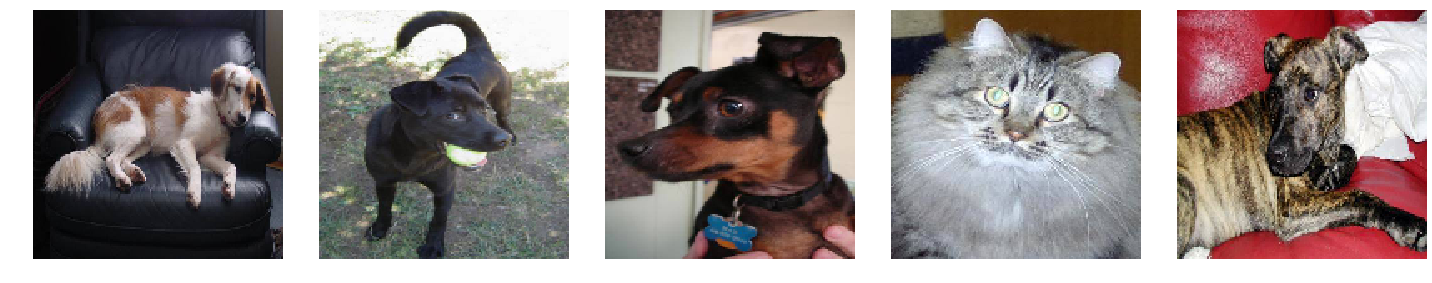

In [55]:
# Plot first 5 images using plotImage function
plotImages(sample_training_images[:5])

In [56]:
# Images as arrays
sample_training_images

array([[[[0.03137255, 0.02352941, 0.02745098],
         [0.03137255, 0.02352941, 0.02745098],
         [0.03529412, 0.02745098, 0.03137255],
         ...,
         [0.3921569 , 0.37254903, 0.36078432],
         [0.3921569 , 0.37254903, 0.36078432],
         [0.39607847, 0.37647063, 0.3647059 ]],

        [[0.03529412, 0.02745098, 0.03137255],
         [0.03529412, 0.02745098, 0.03137255],
         [0.03529412, 0.02745098, 0.03137255],
         ...,
         [0.3921569 , 0.37254903, 0.36078432],
         [0.3921569 , 0.37254903, 0.36078432],
         [0.40000004, 0.36862746, 0.36078432]],

        [[0.03921569, 0.03137255, 0.03529412],
         [0.03921569, 0.03137255, 0.03529412],
         [0.03529412, 0.02745098, 0.03137255],
         ...,
         [0.3921569 , 0.37254903, 0.36078432],
         [0.3921569 , 0.37254903, 0.36078432],
         [0.3921569 , 0.36078432, 0.3529412 ]],

        ...,

        [[0.02352941, 0.02352941, 0.02352941],
         [0.02352941, 0.02352941, 0.02352941]

## Creating the model

In [57]:
# Use Sequential method to create model
# Model uses Conv2D and Maxpooling2D layers, padding kept as same
# Flatten layer of 512 nodes then use sigmoid activation function to classify
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [58]:
# Optimizer set to ADAM.
# Try with Stochastic Gradient Descent "SDG"
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [59]:
# Print summary of model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 20736)            

## Training the model

In [60]:
# Use fit_generator on model to train
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)


Train for 15 steps, validate for 7 steps
Epoch 1/15
15/15 [==============================] - 10s 678ms/step - loss: 1.0098 - accuracy: 0.4893 - val_loss: 0.6924 - val_accuracy: 0.5089
Epoch 2/15
15/15 [==============================] - 10s 638ms/step - loss: 0.6923 - accuracy: 0.5053 - val_loss: 0.6893 - val_accuracy: 0.5502
Epoch 3/15
15/15 [==============================] - 10s 642ms/step - loss: 0.6827 - accuracy: 0.5550 - val_loss: 0.6748 - val_accuracy: 0.5926
Epoch 4/15
15/15 [==============================] - 10s 641ms/step - loss: 0.6697 - accuracy: 0.5929 - val_loss: 0.6572 - val_accuracy: 0.6150
Epoch 5/15
15/15 [==============================] - 10s 635ms/step - loss: 0.6298 - accuracy: 0.6448 - val_loss: 0.6659 - val_accuracy: 0.5547
Epoch 6/15
15/15 [==============================] - 10s 640ms/step - loss: 0.5812 - accuracy: 0.6966 - val_loss: 0.6120 - val_accuracy: 0.6507
Epoch 7/15
15/15 [==============================] - 10s 642ms/step - loss: 0.5312 - accuracy: 0.7425 

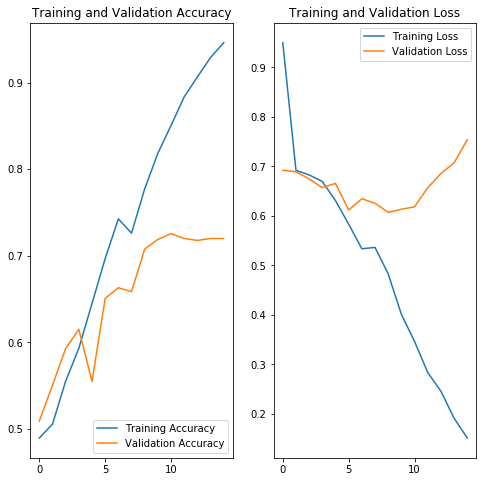

In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

# Plot epochs to Training and Validation Accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot epochs to Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


The accuracy between Training and Validation widens as the number of epochs increases. By epoch 15, the Training Accuracy was around **90%**, but the Validation Accuracy was lower at around **70%.** Looking closely on the Validation Accuracy from epoch 8 onwards stayed around the **70%.** This suggest model overfitted on the training dataset and made the model suffer.

As for the Validation Loss, this significantly increased linearly from epoch 5.

Next, let's take a look at Dropout to see if it fixes this overfitting issue.

### Dropout to model

What is **Dropout?**
* Regularization techniqiue used to reduce overfitting in model
* Forces weights in the model to reduce to small values
* This makes some nodes more active than others
* Nodes are selected randomly (common value is 0.5, meaning 50% of the nodes dropout in each epoch)
* Makes approximations by training large number of neural networks with different architectures in parallel.

Since this dataset was small, Dropout will work effectively here.

In [74]:
# New model with Dropout
# Dropout set to 0.3 to first and last MaxPooling layer
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.3),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.3),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [75]:
# Compile and Summary of new model
model_new.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_new.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 18, 18, 64)       

In [76]:
# Use fit_generator to train new model
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Train for 15 steps, validate for 7 steps
Epoch 1/15
15/15 [==============================] - 10s 693ms/step - loss: 1.1746 - accuracy: 0.4813 - val_loss: 0.6927 - val_accuracy: 0.5089
Epoch 2/15
15/15 [==============================] - 10s 639ms/step - loss: 0.6934 - accuracy: 0.4984 - val_loss: 0.6928 - val_accuracy: 0.5357
Epoch 3/15
15/15 [==============================] - 10s 636ms/step - loss: 0.6928 - accuracy: 0.5304 - val_loss: 0.6894 - val_accuracy: 0.5089
Epoch 4/15
15/15 [==============================] - 10s 640ms/step - loss: 0.6908 - accuracy: 0.5486 - val_loss: 0.6908 - val_accuracy: 0.5513
Epoch 5/15
15/15 [==============================] - 10s 639ms/step - loss: 0.6920 - accuracy: 0.5294 - val_loss: 0.6918 - val_accuracy: 0.5346
Epoch 6/15
15/15 [==============================] - 10s 638ms/step - loss: 0.6866 - accuracy: 0.5401 - val_loss: 0.6881 - val_accuracy: 0.5547
Epoch 7/15
15/15 [==============================] - 10s 640ms/step - loss: 0.6763 - accuracy: 0.5593 

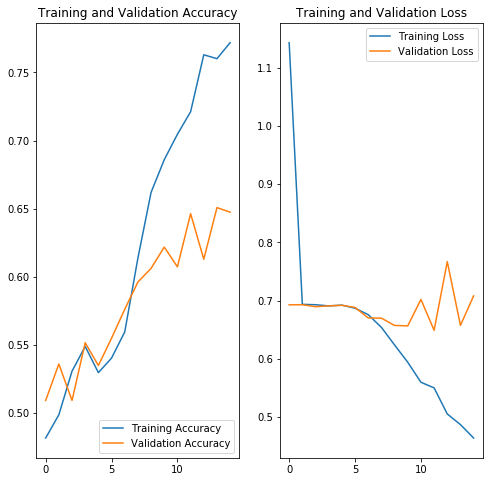

In [77]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


After 15 epochs, the gap between the Training Accuracy and Validation Accuracy has been reduced slightly but there is still a significant difference between the two.

Let's take a look at Data Augmentation where the training data images are modified.

## Data Augmentation

Why agument the data?
* Another method to reduce overfitting in the model
* Generate more images from existing examples, increase the number of training examples
* Model sees more of differences in the data, generalizes better.

### Create Training augmented data

In [78]:
# Apply rotation_range, zoom_range and horizontal_flip in ImageDataGenerator
# Apply wide_shift_range and height_shift_range at .15
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')


Found 2000 images belonging to 2 classes.


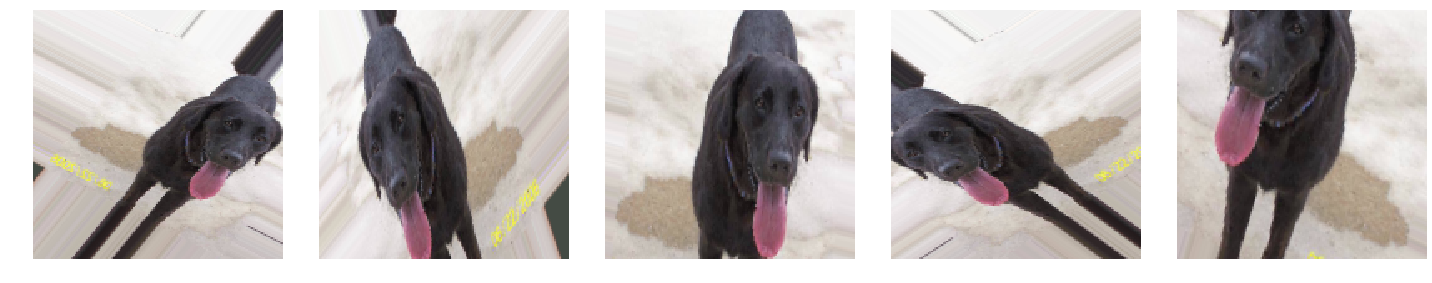

In [79]:
# How the example will look
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [80]:
# Images only needs to be augmented for the Training set
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')


Found 1000 images belonging to 2 classes.


Now lets train our model with the new Training images.

In [81]:
# New model with Dropout
# Dropout set to 0.3 to first and last MaxPooling layer
model_new1 = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.3),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.3),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [82]:
# Compile and Summary of new model
model_new1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_new1.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 18, 18, 64)       

In [83]:
# Use fit_generator to train new model
history = model_new1.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Train for 15 steps, validate for 7 steps
Epoch 1/15
15/15 [==============================] - 21s 1s/step - loss: 1.0472 - accuracy: 0.5107 - val_loss: 0.6927 - val_accuracy: 0.5301
Epoch 2/15
15/15 [==============================] - 19s 1s/step - loss: 0.6930 - accuracy: 0.5053 - val_loss: 0.6933 - val_accuracy: 0.5022
Epoch 3/15
15/15 [==============================] - 19s 1s/step - loss: 0.6930 - accuracy: 0.5075 - val_loss: 0.6930 - val_accuracy: 0.5167
Epoch 4/15
15/15 [==============================] - 19s 1s/step - loss: 0.6928 - accuracy: 0.5510 - val_loss: 0.6920 - val_accuracy: 0.5904
Epoch 5/15
15/15 [==============================] - 19s 1s/step - loss: 0.6919 - accuracy: 0.5369 - val_loss: 0.6894 - val_accuracy: 0.5402
Epoch 6/15
15/15 [==============================] - 19s 1s/step - loss: 0.6918 - accuracy: 0.5272 - val_loss: 0.6895 - val_accuracy: 0.5123
Epoch 7/15
15/15 [==============================] - 19s 1s/step - loss: 0.6914 - accuracy: 0.5545 - val_loss: 0.6897 - 

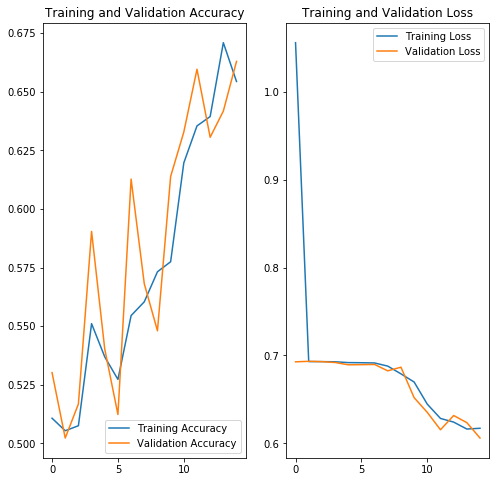

In [84]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Looks like Data Augmentation did the trick! The difference between Training Accuracy and Validation Accuracy has reduced significantly.

## What was learnt
* How to create a simple CNN image classifier using Conv2D and MaxPooling2D layers
* View summary of the model architecture with .summary()
* Model overfits when there is a significant difference in Training Accuracy and Validation Accuracy
* What is Dropout and how to apply Dropout to the model
* How to augment images by rotating, stretching, flip on axis and zoom
* How Dropout and Data Augmentation aid in reducing overfitting of the model.